In [1]:
import numpy as np
import math as math
from matplotlib import pyplot as plt 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random
from sympy import *
from numpy.linalg import inv
import seaborn as sns

Code is primarily inspired by this document
https://www.mdpi.com/1996-1073/12/21/4190/pdf

In [11]:
# Constants
rho = 2.65e-8 # electrical resistivity
miu = 1.257e-6 # Permeability
 
# Input variables
Br = 1.41 # Tesla Natural remnant magnetic field strength
d = 0.0254 # m thickness of permanent magnet
M = 12 # Number of magnets 
lambda_var = 0.06 # m pole pitch 
delta_z = 0.01 # Air Gap in meters
radius = 1.6*25.4/1000 # radius of the halbach wheel 
 
 
#Dimensions of the conducting surface (track)
width_track = 48*25.4/1000 
length_track = 36*25.4/1000
thickness_track = 0.125*25.4/1000
 
Rc = rho*length_track/(width_track*thickness_track) # Resistance of the track
Lc = 0.4e-6 # Inductance of the track (This can be either value via wire inductance calc (approximation) or via theocalc)
# https://www.allaboutcircuits.com/tools/wire-self-inductance-calculator/
k = 2*math.pi/lambda_var
#print(Rc)
 
velocity = np.linspace(0.1,30,1000) # Linear velocity of the array
w = k*velocity # Excitation frequency
print (velocity)
 
sigma = np.sqrt(2*rho/(w*miu))
#print (sigma)
 
# Angular Velocity
w_ang = velocity/(radius)
# RPM
rpm = w_ang/0.104719755
print (w_ang)


[ 0.1         0.12992993  0.15985986  0.18978979  0.21971972  0.24964965
  0.27957958  0.30950951  0.33943944  0.36936937  0.3992993   0.42922923
  0.45915916  0.48908909  0.51901902  0.54894895  0.57887888  0.60880881
  0.63873874  0.66866867  0.6985986   0.72852853  0.75845846  0.78838839
  0.81831832  0.84824825  0.87817818  0.90810811  0.93803804  0.96796797
  0.9978979   1.02782783  1.05775776  1.08768769  1.11761762  1.14754755
  1.17747748  1.20740741  1.23733734  1.26726727  1.2971972   1.32712713
  1.35705706  1.38698699  1.41691692  1.44684685  1.47677678  1.50670671
  1.53663664  1.56656657  1.5964965   1.62642643  1.65635636  1.68628629
  1.71621622  1.74614615  1.77607608  1.80600601  1.83593594  1.86586587
  1.8957958   1.92572573  1.95565566  1.98558559  2.01551552  2.04544545
  2.07537538  2.10530531  2.13523524  2.16516517  2.1950951   2.22502503
  2.25495495  2.28488488  2.31481481  2.34474474  2.37467467  2.4046046
  2.43453453  2.46446446  2.49439439  2.52432432  2.

In [12]:
# Outputs along with other various functions


def B0(Br,d,M,k):
  a = math.sin(math.pi/M)/(math.pi/M)
  b = 1 - (math.exp(-k*d))
  B0_output = Br*a*b
  return B0_output

def Flift_max(B0,Wc,k,Lc,Rc,delta_z,w):
  a = ((math.pow(B0,2))*(math.pow(Wc,2)))/(2*k*Lc)
  b = math.exp(-2*k*delta_z)
  c = ((Rc/(w*Lc))**2) + 1
  force_output = (a*b)/c
  return force_output

def Fdrag(B0,Wc,k,Lc,Rc,delta_z,w):
  a = ((math.pow(B0,2))*(math.pow(Wc,2)))/(2*k*Lc)
  b = math.exp(-2*k*delta_z)
  c = ((Rc/(w*Lc))**2) + 1
  d = Rc/(w*Lc)
  drag_output = a*b*d/c
  return drag_output

def Flift_skin(Fmax,k,sigma):
  a = np.sqrt(1+(np.power(k,4)*np.power(sigma,4)/4))
  b = np.power(k,2)*np.power(sigma,2)/2
  c = np.power((a-b),1.5)
  d = np.power((a+b),1.5)
  e = (k*sigma) + d
  flift_skin_out = Fmax*c/e
  return flift_skin_out

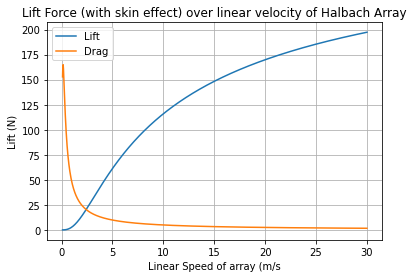

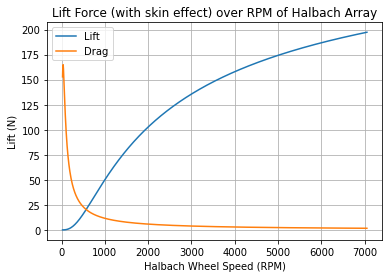

In [13]:

B0_value = B0(Br,d,M,k)
#print (B0_value)

flift_max = Flift_max(B0_value,radius*9,k,Lc,Rc,delta_z,w[-1])
#print(flift_max, "N Maximum Lift Force")

fdrag = Fdrag(B0_value,radius*9,k,Lc,Rc,delta_z,w)
#print (fdrag)

flift_skin_results = Flift_skin(flift_max,k,sigma)
#print(flift_skin_results)

plt.figure(0)
plt.plot(velocity,flift_skin_results)
plt.plot(velocity,fdrag)
plt.legend(["Lift","Drag"])
plt.title("Lift Force (with skin effect) over linear velocity of Halbach Array")
plt.xlabel("Linear Speed of array (m/s")
plt.ylabel("Lift (N)")
plt.grid(true)

plt.figure(1)
#plt.plot(velocity,flift_skin_results)
plt.plot(rpm,flift_skin_results)
plt.plot(rpm,fdrag)
plt.legend(["Lift","Drag"])
plt.title("Lift Force (with skin effect) over RPM of Halbach Array")
plt.xlabel("Halbach Wheel Speed (RPM)")
plt.ylabel("Lift (N)")
plt.grid(true)